In [1]:
import polars as pl
import pyarrow.parquet as pq
import sys

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

filepath = "../Data/processed/sirene_infos.parquet" 

print("--- Début de la lecture 'bypass' ---")

try:
    print(f"Lecture du fichier via PyArrow : {filepath}")
    table_arrow = pq.read_table(
        filepath,
    )
    
    print("Conversion de la table PyArrow en DataFrame Polars...")
    df_demo = pl.from_arrow(table_arrow)
    
    print("--- SUCCÈS ! ---\n")
    print("Le DataFrame est maintenant dans Polars, prêt pour la transformation.")
    print(df_demo.head())

except Exception as e:
    print(f"\n--- ERREUR ---", file=sys.stderr)
    print(f"Impossible de lire le fichier, même avec PyArrow : {e}", file=sys.stderr)

--- Début de la lecture 'bypass' ---
Lecture du fichier via PyArrow : ../Data/processed/sirene_infos.parquet
Conversion de la table PyArrow en DataFrame Polars...
--- SUCCÈS ! ---

Le DataFrame est maintenant dans Polars, prêt pour la transformation.
shape: (5, 15)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ siren     ┆ dateCreat ┆ dateFerme ┆ is_failed ┆ … ┆ moisCreat ┆ departeme ┆ trancheEf ┆ caracter │
│ ---       ┆ ionUniteL ┆ ture      ┆ _in_3y    ┆   ┆ ion       ┆ nt        ┆ fectifsSi ┆ eEmploye │
│ str       ┆ egale     ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ege       ┆ urSiege  │
│           ┆ ---       ┆ date      ┆ i32       ┆   ┆ i8        ┆ str       ┆ ---       ┆ ---      │
│           ┆ date      ┆           ┆           ┆   ┆           ┆           ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 000325175 ┆ 2000-09-2 ┆ n

In [2]:
df_demo.describe()

statistic,siren,dateCreationUniteLegale,dateFermeture,is_failed_in_3y,categorieJuridiqueUniteLegale,trancheEffectifsUniteLegale,activitePrincipaleUniteLegale,categorieEntreprise,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,anneeCreation,moisCreation,departement,trancheEffectifsSiege,caractereEmployeurSiege
str,str,str,str,f64,f64,str,str,str,str,str,f64,f64,str,str,str
"""count""","""10223433""","""10223433""","""432318""",1.0223433e7,1.0223433e7,"""10223433""","""10223433""","""10223433""","""10223433""","""10223433""",1.0223433e7,1.0223433e7,"""10223433""","""10223433""","""10223433"""
"""null_count""","""0""","""0""","""9791115""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0"""
"""mean""",null,"""2012-06-08 22:07:57.438449""","""2018-11-30 19:07:51.502921""",0.008756,3056.154825,null,null,null,null,null,2011.980528,6.185161,null,null,null
"""std""",null,null,null,0.093165,2549.956592,null,null,null,null,null,11.055441,3.593599,null,null,null
"""min""","""000325175""","""1970-01-01""","""1971-04-19""",0.0,1000.0,"""00""","""00.00Z""","""ETI""","""INCONNU""","""INCONNU""",1970.0,1.0,""" D""","""00""","""N"""
"""25%""",null,"""2007-05-10""","""2017-01-02""",0.0,1000.0,null,null,null,null,null,2007.0,3.0,null,null,null
"""50%""",null,"""2016-02-01""","""2020-12-31""",0.0,1000.0,null,null,null,null,null,2016.0,6.0,null,null,null
"""75%""",null,"""2021-02-11""","""2022-12-31""",0.0,5499.0,null,null,null,null,null,2021.0,9.0,null,null,null
"""max""","""999992357""","""2025-11-01""","""2025-11-17""",1.0,9970.0,"""NN""","""99.00Z""","""PME""","""O""","""O""",2025.0,12.0,"""sw""","""NN""","""O"""


In [3]:
from datetime import datetime
today = datetime.now()
df_demo = df_demo.with_columns(
    pl.when(pl.col("dateFermeture").is_not_null())
    .then(pl.col("dateFermeture"))
    .otherwise(pl.lit(today).cast(pl.Date)) # Use current date if active
    .alias("effective_end_date")
)

# Calculate duration in days then years
df_demo = df_demo.with_columns(
    ((pl.col("effective_end_date") - pl.col("dateCreationUniteLegale")).dt.total_days() / 365).round().alias("age_years")
)

In [4]:
#remove dateFermeture
df_test = df_demo.drop("dateFermeture")
df_test.describe()

statistic,siren,dateCreationUniteLegale,is_failed_in_3y,categorieJuridiqueUniteLegale,trancheEffectifsUniteLegale,activitePrincipaleUniteLegale,categorieEntreprise,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,anneeCreation,moisCreation,departement,trancheEffectifsSiege,caractereEmployeurSiege,effective_end_date,age_years
str,str,str,f64,f64,str,str,str,str,str,f64,f64,str,str,str,str,f64
"""count""","""10223433""","""10223433""",1.0223433e7,1.0223433e7,"""10223433""","""10223433""","""10223433""","""10223433""","""10223433""",1.0223433e7,1.0223433e7,"""10223433""","""10223433""","""10223433""","""10223433""",1.0223433e7
"""null_count""","""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""",0.0
"""mean""",null,"""2012-06-08 22:07:57.438449""",0.008756,3056.154825,null,null,null,null,null,2011.980528,6.185161,null,null,null,"""2025-08-03 08:54:21.611867""",13.163234
"""std""",null,null,0.093165,2549.956592,null,null,null,null,null,11.055441,3.593599,null,null,null,null,11.000322
"""min""","""000325175""","""1970-01-01""",0.0,1000.0,"""00""","""00.00Z""","""ETI""","""INCONNU""","""INCONNU""",1970.0,1.0,""" D""","""00""","""N""","""1971-04-19""",0.0
"""25%""",null,"""2007-05-10""",0.0,1000.0,null,null,null,null,null,2007.0,3.0,null,null,null,"""2025-11-19""",5.0
"""50%""",null,"""2016-02-01""",0.0,1000.0,null,null,null,null,null,2016.0,6.0,null,null,null,"""2025-11-19""",9.0
"""75%""",null,"""2021-02-11""",0.0,5499.0,null,null,null,null,null,2021.0,9.0,null,null,null,"""2025-11-19""",18.0
"""max""","""999992357""","""2025-11-01""",1.0,9970.0,"""NN""","""99.00Z""","""PME""","""O""","""O""",2025.0,12.0,"""sw""","""NN""","""O""","""2025-11-19""",56.0


In [5]:
df = df_test.to_pandas()
X = df.drop(columns=["is_failed_in_3y"])
y = df["is_failed_in_3y"]

In [6]:
df.head()

,siren,dateCreationUniteLegale,is_failed_in_3y,categorieJuridiqueUniteLegale,trancheEffectifsUniteLegale,activitePrincipaleUniteLegale,categorieEntreprise,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,anneeCreation,moisCreation,departement,trancheEffectifsSiege,caractereEmployeurSiege,effective_end_date,age_years
0,000325175,2000-09-26,0,1000,NN,32.12Z,PME,INCONNU,INCONNU,2000,9,13,NN,N,2025-11-19,25.0
1,005540273,1972-01-01,0,1000,NN,68.20B,PME,INCONNU,INCONNU,1972,1,04,NN,N,2025-11-19,54.0
2,005541552,1974-01-01,0,5710,02,56.10C,PME,N,INCONNU,1974,1,04,01,O,2025-11-19,52.0
3,005641154,1981-02-01,0,1000,NN,68.31Z,PME,INCONNU,INCONNU,1981,2,04,NN,N,2025-11-19,45.0
4,005742580,1993-03-01,0,1000,NN,68.20B,PME,INCONNU,INCONNU,1993,3,04,NN,N,2025-11-19,33.0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10223433 entries, 0 to 10223432
Data columns (total 15 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   siren                                object        
 1   dateCreationUniteLegale              datetime64[ms]
 2   categorieJuridiqueUniteLegale        int64         
 3   trancheEffectifsUniteLegale          object        
 4   activitePrincipaleUniteLegale        object        
 5   categorieEntreprise                  object        
 6   economieSocialeSolidaireUniteLegale  object        
 7   societeMissionUniteLegale            object        
 8   anneeCreation                        int32         
 9   moisCreation                         int8          
 10  departement                          object        
 11  trancheEffectifsSiege                object        
 12  caractereEmployeurSiege              object        
 13  effective_end_date       

In [8]:
DEMO_FEATURES = [
    "trancheEffectifsUniteLegale",
    "activitePrincipaleUniteLegale",
    "categorieEntreprise",
    "economieSocialeSolidaireUniteLegale",
    "societeMissionUniteLegale",
    "departement",
    "trancheEffectifsSiege",
    "caractereEmployeurSiege"
]

Chargement du dataset ML final (836k lignes)...
Dataset chargé. Shape: (10223433, 15)
Définition des features pour le Modèle A (Démo uniquement)...
Training LightGBM...
Evaluating...
--- LightGBM Results ---
ROC-AUC Score: 0.7282
              precision    recall  f1-score   support

           0       1.00      0.53      0.69   2026783
           1       0.02      0.83      0.03     17904

    accuracy                           0.53   2044687
   macro avg       0.51      0.68      0.36   2044687
weighted avg       0.99      0.53      0.69   2044687



/var/folders/78/l_4xwnr90kd9z9r2bqrlqkqw0000gn/T/ipykernel_10573/1588443309.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


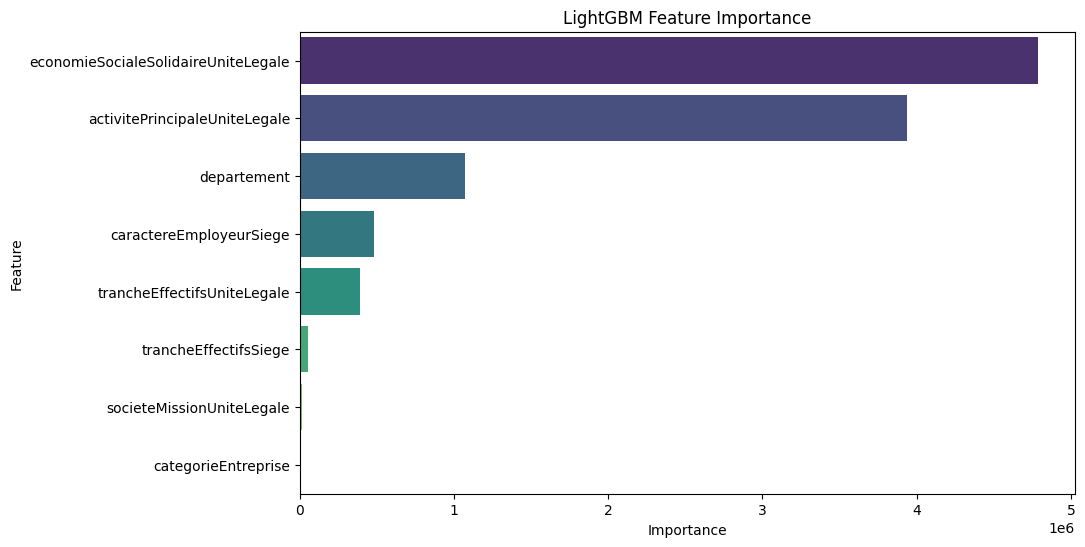

In [ ]:
import polars as pl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# --- 1. CHARGER LE DATASET ML FINAL (LE COMPLET) ---
print("Chargement du dataset ML final (836k lignes)...")
try:
    df_final_ml = pl.read_parquet("../Data/processed/sirene_infos.parquet")
    print(f"Dataset chargé. Shape: {df_final_ml.shape}")
except Exception as e:
    print("ERREUR: Fichier 'dataset_ml.parquet' non trouvé.")
    print(e)

# --- 2. DÉFINITION DES FEATURES (ITÉRATION 1 : DÉMO) ---
print("Définition des features pour le Modèle A (Démo uniquement)...")

from lightgbm import LGBMClassifier

# --- 1. LOAD DATA ---
# Assuming df_final_ml is loaded from your Polars parquet
# df_final_ml = pl.read_parquet("../Data/processed/sirene_infos.parquet")

DEMO_FEATURES = [
    "trancheEffectifsUniteLegale",
    "activitePrincipaleUniteLegale",
    "categorieEntreprise",
    "economieSocialeSolidaireUniteLegale",
    "societeMissionUniteLegale",
    "departement",
    "trancheEffectifsSiege",
    "caractereEmployeurSiege"
]
TARGET = "is_failed_in_3y"

# --- 2. CONVERT TO PANDAS WITH CATEGORY DTYPE ---
# This is the secret sauce. No OneHotEncoder needed.
X = df_final_ml.select(DEMO_FEATURES).to_pandas()
y = df_final_ml.select(TARGET).to_pandas().squeeze()

# Convert object/string columns to 'category' type
# LightGBM reads this specific dtype to know how to handle it
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category')

# --- 3. SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. TRAIN LIGHTGBM ---
print("Training LightGBM...")

# class_weight='balanced' handles the imbalance (few failures, many successes)
model = LGBMClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    importance_type='gain',
    verbose=-1  # Suppress warnings
)

model.fit(X_train, y_train)

# --- 5. EVALUATE ---
print("Evaluating...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"--- LightGBM Results ---")
print(f"ROC-AUC Score: {auc_score:.4f}")
print(classification_report(y_test, y_pred))

# --- 6. FEATURE IMPORTANCE (Bonus) ---
# See which factors drive failure the most
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('LightGBM Feature Importance')
plt.show()



# Then fit on the same X (converted to category dtype)

In [4]:
df_final_ml.describe()

statistic,siren,dateCreationUniteLegale,dateFermeture,is_failed_in_3y,categorieJuridiqueUniteLegale,trancheEffectifsUniteLegale,activitePrincipaleUniteLegale,categorieEntreprise,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,anneeCreation,moisCreation,departement,trancheEffectifsSiege,caractereEmployeurSiege
str,str,str,str,f64,f64,str,str,str,str,str,f64,f64,str,str,str
"""count""","""10223433""","""10223433""","""432318""",1.0223433e7,1.0223433e7,"""10223433""","""10223433""","""10223433""","""10223433""","""10223433""",1.0223433e7,1.0223433e7,"""10223433""","""10223433""","""10223433"""
"""null_count""","""0""","""0""","""9791115""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0"""
"""mean""",null,"""2012-06-08 22:07:57.438449""","""2018-11-30 19:07:51.502921""",0.008756,3056.154825,null,null,null,null,null,2011.980528,6.185161,null,null,null
"""std""",null,null,null,0.093165,2549.956592,null,null,null,null,null,11.055441,3.593599,null,null,null
"""min""","""000325175""","""1970-01-01""","""1971-04-19""",0.0,1000.0,"""00""","""00.00Z""","""ETI""","""INCONNU""","""INCONNU""",1970.0,1.0,""" D""","""00""","""N"""
"""25%""",null,"""2007-05-10""","""2017-01-02""",0.0,1000.0,null,null,null,null,null,2007.0,3.0,null,null,null
"""50%""",null,"""2016-02-01""","""2020-12-31""",0.0,1000.0,null,null,null,null,null,2016.0,6.0,null,null,null
"""75%""",null,"""2021-02-11""","""2022-12-31""",0.0,5499.0,null,null,null,null,null,2021.0,9.0,null,null,null
"""max""","""999992357""","""2025-11-01""","""2025-11-17""",1.0,9970.0,"""NN""","""99.00Z""","""PME""","""O""","""O""",2025.0,12.0,"""sw""","""NN""","""O"""


In [1]:
import polars as pl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# --- 1. CHARGER LE DATASET ML FINAL (LE COMPLET) ---
print("Chargement du dataset ML final (836k lignes)...")
try:
    df_final_ml = pl.read_parquet("../Data/processed/sirene_infos.parquet")
    print(f"Dataset chargé. Shape: {df_final_ml.shape}")
except Exception as e:
    print("ERREUR: Fichier 'dataset_ml.parquet' non trouvé.")
    print(e)

# --- 2. DÉFINITION DES FEATURES (ITÉRATION 1 : DÉMO) ---
print("Définition des features pour le Modèle A (Démo uniquement)...")

DEMO_FEATURES = [
    "categorieJuridiqueUniteLegale",
    "trancheEffectifsUniteLegale",
    "activitePrincipaleUniteLegale",
    # "categorieEntreprise", # Redondant
    # "economieSocialeSolidaireUniteLegale", # Trop peu de '1'
    # "societeMissionUniteLegale", # Trop peu de '1'
    "departement"
]

TARGET = "is_failed_in_3y"

# On convertit en Pandas pour Scikit-Learn
X = df_final_ml.select(DEMO_FEATURES).to_pandas()
y = df_final_ml.select(TARGET).to_pandas().squeeze()

print(f"Features (X) sélectionnées: {X.columns.to_list()}")
print(f"Target (y) sélectionnée: {y.name}")

# --- 3. GESTION DU DÉSÉQUILIBRE (sur 836k lignes) ---
# (Nombre de 0 / Nombre de 1)
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
print(f"Ratio de déséquilibre (sur 836k lignes): {scale_pos_weight:.2f}")

# --- 4. PRÉPARATION (Preprocessing) ---
# Nos features sont toutes catégorielles. On doit les One-Hot Encoder.
categorical_features = DEMO_FEATURES
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
)

# --- 5. SPLIT (Train / Test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 6. CRÉATION DE LA PIPELINE DE MODÉLISATION ---
print("Création de la pipeline (Preprocessor + XGBoost)...")

model_A = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        scale_pos_weight=scale_pos_weight, 
        use_label_encoder=False, 
        eval_metric='logloss',
        random_state=42,
        enable_categorical=False # On le désactive car on fait un OHE
    ))
])

# --- 7. ENTRAÎNEMENT (Baseline) ---
print("Entraînement du Modèle A (Baseline)...")
model_A.fit(X_train, y_train)

# --- 8. ÉVALUATION (Le Score "Baseline") ---
print("Évaluation du Modèle A...")
y_pred = model_A.predict(X_test)
y_pred_proba = model_A.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred, target_names=["Survivant (0)", "Faillite (1)"])

print("---")
print("--- RÉSULTATS DU MODÈLE A (BASELINE 'DÉMO') ---")
print(f"Score ROC-AUC (Baseline): {auc_score:.4f}")
print("---")
print("Rapport de Classification (Baseline):")
print(report)
print("---")

# Plot Matrice de Confusion
print("Matrice de Confusion (Baseline):")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survivant", "Faillite"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Chargement du dataset ML final (836k lignes)...
Dataset chargé. Shape: (10223433, 15)
Définition des features pour le Modèle A (Démo uniquement)...
Features (X) sélectionnées: ['categorieJuridiqueUniteLegale', 'trancheEffectifsUniteLegale', 'activitePrincipaleUniteLegale', 'departement']
Target (y) sélectionnée: is_failed_in_3y
Ratio de déséquilibre (sur 836k lignes): 113.20
Création de la pipeline (Preprocessor + XGBoost)...
Entraînement du Modèle A (Baseline)...


: 